# Cross-Validation

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Cross-Validation Basics

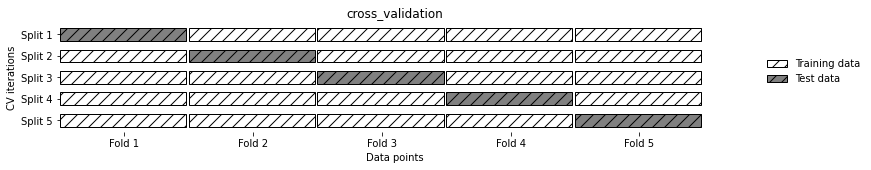

In [2]:
from helpers.plot_cross_validation import plot_cross_validation

plot_cross_validation()

## Cross-Validation in scikit-learn

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [4]:
iris = load_iris()
logreg = LogisticRegression(max_iter=10000)

scores = cross_val_score(logreg, iris.data, iris.target)
print(f"Cross-validation scores: {scores}")

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [5]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=3)
print(f"Cross-validation scores: {scores}")

Cross-validation scores: [0.98 0.96 0.98]


In [6]:
print(f"Average cross-validation score: {scores.mean():.2f}")

Average cross-validation score: 0.97


## Benefits of Cross-Validation

## Stratified k-Fold Cross-Validation and Other Strategies

In [7]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

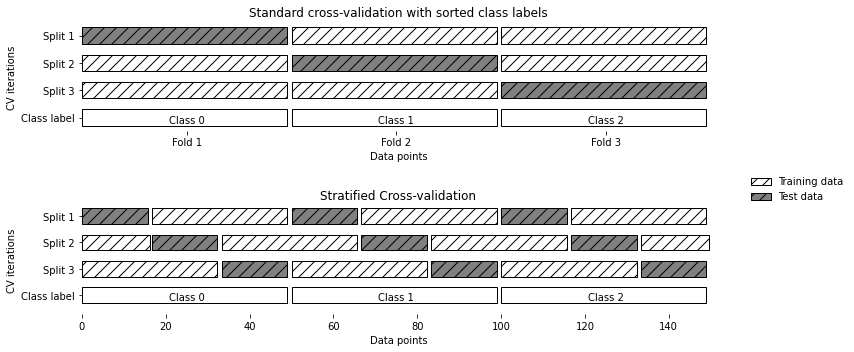

In [8]:
from helpers.plot_cross_validation import plot_stratified_cross_validation
plot_stratified_cross_validation()

### More control over cross-validation

In [9]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)

In [10]:
print(f"Cross-validation scores:\n{cross_val_score(logreg, iris.data, iris.target, cv=kfold)}")

Cross-validation scores:
[1.         1.         0.86666667 0.93333333 0.83333333]


In [11]:
kfold = KFold(n_splits=3)

print(f"Cross-validation scores:\n{cross_val_score(logreg, iris.data, iris.target, cv=kfold)}")

Cross-validation scores:
[0. 0. 0.]


In [12]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)

print(f"Cross-validation scores:\n{cross_val_score(logreg, iris.data, iris.target, cv=kfold)}")

Cross-validation scores:
[0.98 0.96 0.96]


### Leave-one-out cross-validation

In [13]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)

print("Number of cv iterations: ", len(scores))
print(f"Mean accuracy: {scores.mean():.2f}")

Number of cv iterations:  150
Mean accuracy: 0.97


### Shuffle-split cross-validation

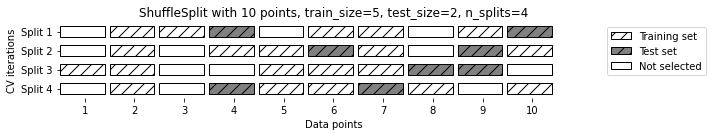

In [14]:
from helpers.plot_cross_validation import plot_shuffle_split
plot_shuffle_split()

In [15]:
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)

print(f"Cross-validation scores:\n{scores}")

Cross-validation scores:
[0.96       0.90666667 0.96       0.93333333 0.93333333 0.98666667
 0.96       0.97333333 0.96       0.97333333]


### Cross-validation with groups

In [17]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import GroupKFold

# create synthetic dataset
X, y = make_blobs(n_samples=12, random_state=0)

# assume the first three samples belong to the same group,
# then the next four, etc.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]

scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
print(f"Cross-validation scores:\n{scores}")

Cross-validation scores:
[0.75       0.6        0.66666667]


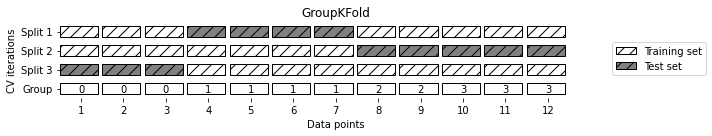

In [18]:
from helpers.plot_cross_validation import plot_group_kfold
plot_group_kfold()